In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"..\..\data\raw\UniversitiesDataSet.csv")
df.head(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012


In [3]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [12]:
from scripts import project_functions
#project_functions.load_and_process(r"..\..\data\raw\UniversitiesDataSet.csv")

Inspect data types, number of null values, mean, median, min and max for each year:

In [15]:
def uni_eda(df): 
    
    years = list(df.groupby('year').groups.keys())
    years_i = df.groupby('year')
    dfs = []
    for i in range(len(years)):
        
        df_h = years_i.get_group(years[i])
        eda_df = {}
        eda_df['null_sum'] = df_h.isnull().sum()
        eda_df['dtypes'] = df_h.dtypes
        eda_df['mean'] = df_h.mean()
        eda_df['median'] = df_h.median()
        eda_df['min'] = df_h.min()
        eda_df['max'] = df_h.max()
        
        dfs.append(pd.DataFrame(eda_df)) 
        final_df = pd.concat(dfs, keys = ['2012', '2013', '2014', '2015'])
    return final_df
uni_eda(df)

C:\Users\ww\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


null_sum   dtypes        mean   median  \
2012 alumni_employment            0    int64    75.39000   101.00   
     broad_impact               100  float64         NaN      NaN   
     citations                    0    int64    54.42000    51.50   
     country                      0   object         NaN      NaN   
     influence                    0    int64    54.89000    51.50   
     institution                  0   object         NaN      NaN   
     national_rank                0    int64    18.14000     8.50   
     patents                      0    int64    63.65000    67.50   
     publications                 0    int64    55.02000    52.50   
     quality_of_education         0    int64    66.42000    78.00   
     quality_of_faculty           0    int64    56.93000    53.00   
     score                        0  float64    54.94090    50.15   
     world_rank                   0    int64    50.50000    50.50   
     year                         0    int64  2012.00000  2012.00   
2013 alumni_employment            0    int64    75.91000   101.00   
     broad_impact               100  float64         NaN      NaN   
     citations                    0    int64    53.93000    51.50   
     country                      0   object         NaN      NaN   
     influence                    0    int64    56.28000    52.50   
     institution                  0   object         NaN      NaN   
     national_rank                0    int64    17.62000     7.50   
     patents                      0    int64    63.55000    67.00   
     publications                 0    int64    54.67000    51.00   
     quality_of_education         0    int64    65.76000    78.00   
     quality_of_faculty           0    int64    56.06000    51.50   
     score                        0  float64    55.27120    49.70   
     world_rank                   0    int64    50.50000    50.50   
     year                         0    int64  2013.00000  2013.00   
2014 alumni_employment            0    int64   363.99100   478.00   
     broad_impact                 0  float64   496.73500   496.00   
     citations                    0    int64   447.34900   493.00   
     country                      0   object         NaN      NaN   
     influence                    0    int64   500.16300   500.50   
     institution                  0   object         NaN      NaN   
     national_rank                0    int64    42.52400    22.00   
     patents                      0    int64   448.96800   481.00   
     publications                 0    int64   500.41100   500.50   
     quality_of_education         0    int64   292.16400   355.00   
     quality_of_faculty           0    int64   188.00200   210.00   
     score                        0  float64    47.27141    45.11   
     world_rank                   0    int64   500.50000   500.50   
     year                         0    int64  2014.00000  2014.00   
2015 alumni_employment            0    int64   406.53600   500.50   
     broad_impact                 0  float64   496.66400   495.00   
     citations                    0    int64   451.33400   428.00   
     country                      0   object         NaN      NaN   
     influence                    0    int64   500.27500   500.50   
     institution                  0   object         NaN      NaN   
     national_rank                0    int64    42.51200    22.00   
     patents                      0    int64   491.67400   500.50   
     publications                 0    int64   500.41900   500.50   
     quality_of_education         0    int64   299.83900   367.00   
     quality_of_faculty           0    int64   194.25300   218.00   
     score                        0  float64    46.86385    44.78   
     world_rank                   0    int64   500.50000   500.50   
     year                         0    int64  2015.00000  2015.00   

                                                                min  \
2012 alumni_employment

Show the pairwise correlations between all the columns and alumni employment rate for all years (2012-2015)

<AxesSubplot:>

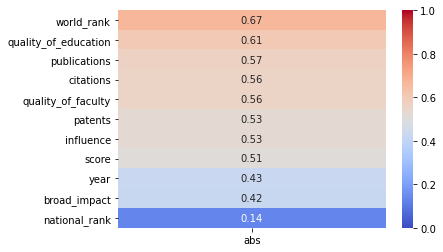

In [47]:
correlations = df.corrwith(df['alumni_employment']).to_frame().drop('alumni_employment')
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

Show the pairwise correlations between all the columns and alumni employment rate for each year

In [52]:
def plot_each_year(year, df):
    years = list(df.groupby('year').groups.keys())
    years_i = df.groupby('year')
    correlations = years_i.get_group(year).corrwith(df['alumni_employment']).to_frame().drop(['alumni_employment', 'year'])
    correlations['abs'] = correlations[0].abs()
    sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
    return sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

In [61]:
def plotting(year):
    if year == 2012:
        plot_each_year(2012)
    elif year == 2013:
        plot_each_year(2012)
    elif year == 2014:
        plot_each_year(2014)
    elif year == 2015:
        plot_each_year(2015)
    else:
        print('There is no information for this year')

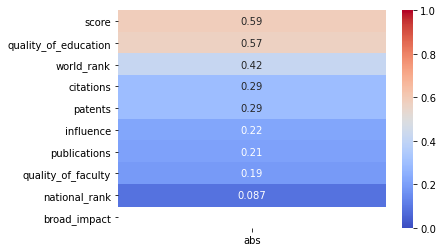

In [64]:
plotting(2012)

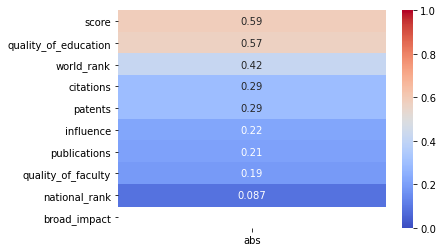

In [65]:
plotting(2013)

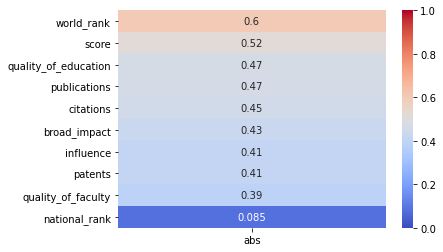

In [66]:
plotting(2014)

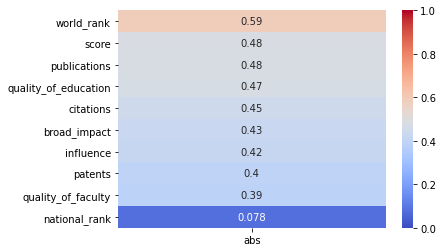

In [67]:
plotting(2015)

How does the country of an institution affect alumni employemnt rate overall?

C:\Users\ww\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country vs. Alumni Employment rate')

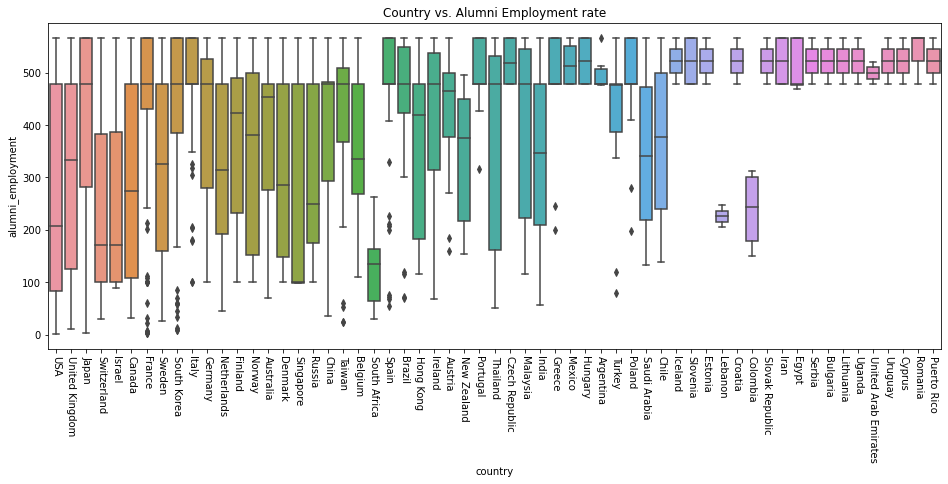

In [87]:
def country_plot(df):
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=270)
    return sns.boxplot(df['country'], df['alumni_employment']).set_title('Country vs. Alumni Employment rate')
country_plot()